In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../..")


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from opdynamics.math.utils import generate_random_samples

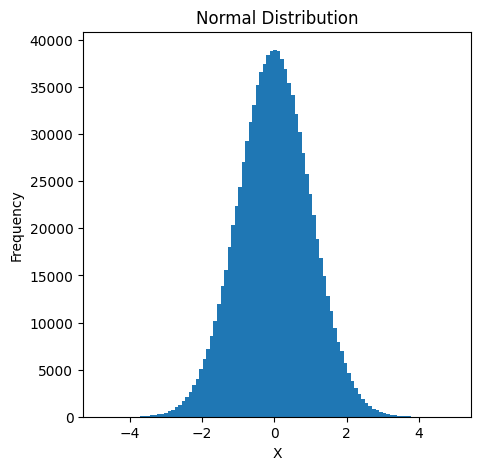

In [25]:
X = generate_random_samples(
    n_samples = 1000000,
    n_dimensions = 1,
    distribution = 'normal'
)

ax = plt.subplots(figsize = (5, 5))[1]
ax.set_title('Normal Distribution')
ax.set_xlabel('X')
ax.set_ylabel('Frequency')

_ = ax.hist(X, bins=100)

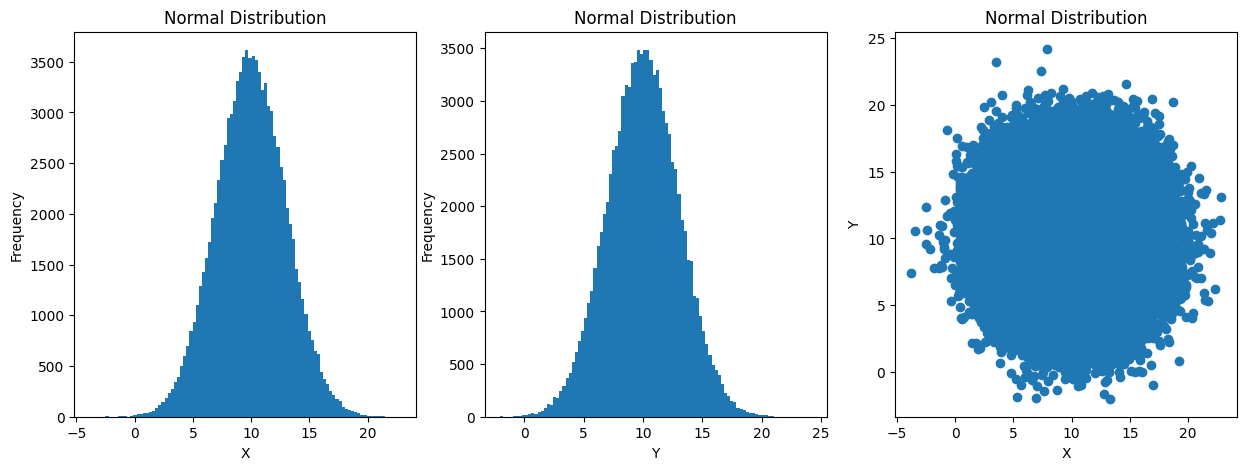

In [29]:
X = generate_random_samples(
    n_samples = 100000,
    n_dimensions = 2,
    distribution = 'normal',
    scale = 3.0,
    loc = 10.0
)

axs = plt.subplots(ncols = 3, nrows = 1, figsize = (15, 5))[1]
axs[0].set_title('Normal Distribution')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Frequency')
_ = axs[0].hist(X[:, 0], bins=100)

axs[1].set_title('Normal Distribution')
axs[1].set_xlabel('Y')
axs[1].set_ylabel('Frequency')
_ = axs[1].hist(X[:, 1], bins=100)

axs[2].set_title('Normal Distribution')
axs[2].set_xlabel('X')
axs[2].set_ylabel('Y')
_ = axs[2].scatter(X[:, 0], X[:, 1])
plt.show()

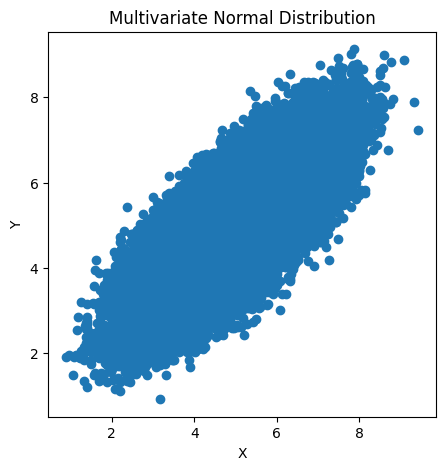

In [45]:
X = generate_random_samples(
    n_samples = 100000,
    n_dimensions = 2,
    distribution = 'multivariate_normal',
    mean = np.array([5, 5]),
    cov = np.array([[1, 0.75], [0.75, 1]]),
)

ax = plt.subplots(figsize = (5, 5))[1]
ax.set_title('Multivariate Normal Distribution')
ax.set_xlabel('X')
ax.set_ylabel('Y')
_ = ax.scatter(X[:, 0], X[:, 1])

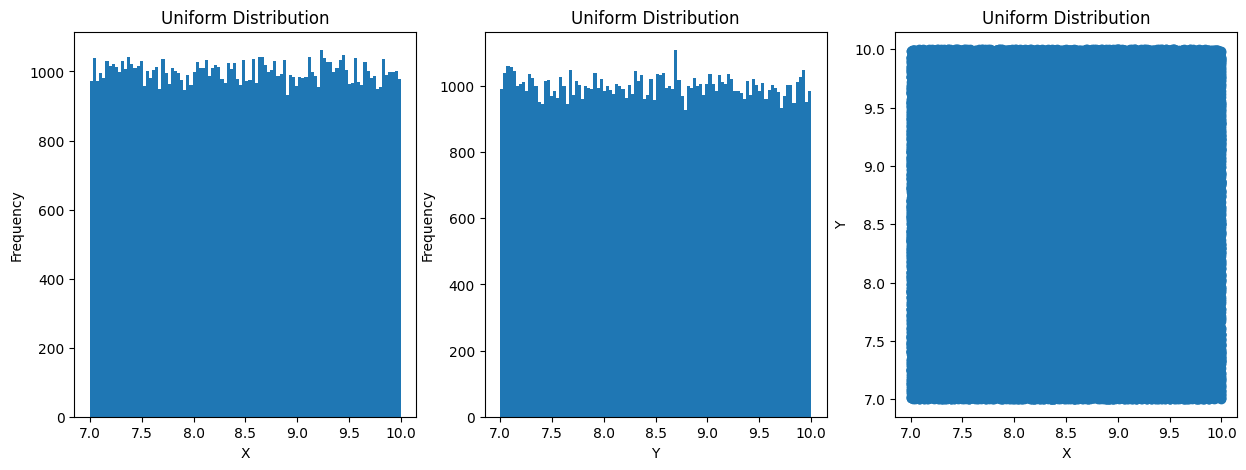

In [ ]:
X = generate_random_samples(
    n_samples = 100000,
    n_dimensions = 2,
    distribution = 'uniform',
    low = 7,
    high = 10
)

axs = plt.subplots(ncols = 3, nrows = 1, figsize = (15, 5))[1]
axs[0].set_title('Uniform Distribution')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Frequency')
_ = axs[0].hist(X[:, 0], bins=100)

axs[1].set_title('Uniform Distribution')
axs[1].set_xlabel('Y')
axs[1].set_ylabel('Frequency')
_ = axs[1].hist(X[:, 1], bins=100)

axs[2].set_title('Uniform Distribution')
axs[2].set_xlabel('X')
axs[2].set_ylabel('Y')
_ = axs[2].scatter(X[:, 0], X[:, 1])

***

In [4]:
from opdynamics.components.memory import probability_distribution

In [10]:
codes_x = generate_random_samples(
    n_samples = 32,
    n_dimensions = 2,
    distribution = 'multivariate_normal',
    mean = np.array([2, 2]),
)
codes_y = generate_random_samples(
    n_samples = 32,
    n_dimensions = 2,
    distribution = 'multivariate_normal',
    mean = np.array([-2, -2]),
)

In [11]:
P_x = probability_distribution(codes = codes_x)

In [12]:
P_y = probability_distribution(codes = codes_y)

In [13]:
X_grid = np.linspace(
    np.min([codes_x[:, 0], codes_y[:, 0]]),
    np.max([codes_x[:, 0], codes_y[:, 0]]),
    100
)
Y_grid = np.linspace(
    np.min([codes_x[:, 1], codes_y[:, 1]]),
    np.max([codes_x[:, 1], codes_y[:, 1]]),
    100
)

grid = np.meshgrid(X_grid, Y_grid)
grid = np.stack([grid[0].ravel(), grid[1].ravel()], axis = 1)

density_x = np.exp(P_x.score_samples(grid))
density_x /= np.sum(density_x)
density_y = np.exp(P_y.score_samples(grid))
density_y /= np.sum(density_y)
density = (density_x + density_y) / 2

In [ ]:
x = log(z) = 4
z = exp(4) = 54.598150033144236

In [ ]:
n * (1/xy)*log(1/xy) = n * 1/4 * log(1 / 4)

In [22]:
- 64 * 1/4 * np.log(1 / 4)

np.float64(22.18070977791825)

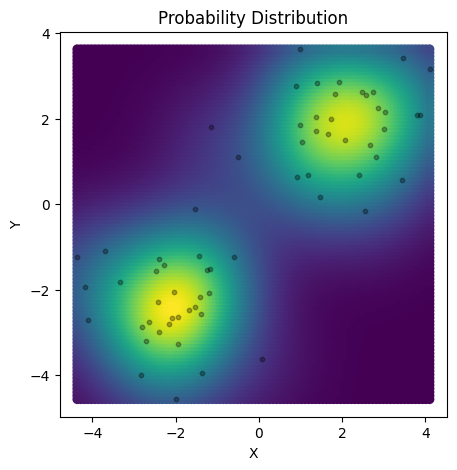

In [14]:
ax = plt.subplots(figsize = (5, 5))[1]
ax.set_title('Probability Distribution')
ax.set_xlabel('X')
ax.set_ylabel('Y')

_ = ax.scatter(grid[:, 0], grid[:, 1], c = density, cmap = 'viridis')
_ = ax.scatter(codes_x[:, 0], codes_x[:, 1], c = 'k', s = 10, alpha = 0.3)
_ = ax.scatter(codes_y[:, 0], codes_y[:, 1], c = 'k', s = 10, alpha = 0.3)

***

In [15]:
from opdynamics.components.memory import initialize_memory

In [20]:
memory = initialize_memory(
    memory_size = 128,
    info_dimension = 2,
    distribution = 'multivariate_normal',
)